In [2]:
import numpy as np
import random
import json
import cv2 as cv
import pandas as pd
import matplotlib.pyplot as plt
import xml.etree.ElementTree as ET
from sklearn.model_selection import train_test_split
import tensorflow as tf
import keras 
from keras.models import Sequential
from keras import regularizers
from keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D
from keras.preprocessing.image import ImageDataGenerator
from keras.applications.resnet import ResNet50

In [3]:
labels = pd.read_csv('labels3.csv')
num = len(labels)
labels = labels.iloc[: , 1:]
labels

,lables
0,1
1,1
2,1
3,1
4,1
...,...
12849,0
12850,0
12851,0
12852,0


In [4]:
path = 'imcrop3/'
imgs = []
for i in range(num):
    img = cv.imread(path + "t{}.jpg".format(i))
    imgs.append(img)

12854

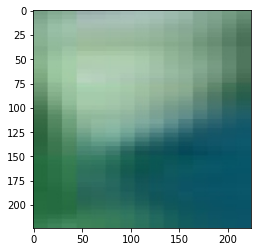

In [5]:
rand = random.randint(0,num)
img_show = imgs[rand]
plt.imshow(img_show)
len(imgs)



In [6]:
X_train, X_test , y_train, y_test = train_test_split(np.array(imgs),np.array(labels),test_size=0.10)

In [7]:
print((np.array(labels)).shape)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)
(np.array(imgs)).shape


(12854, 1)
(11568, 224, 224, 3)
(1286, 224, 224, 3)
(11568, 1)
(1286, 1)


(12854, 224, 224, 3)

In [8]:
datagen = ImageDataGenerator(
    featurewise_center=True,
    featurewise_std_normalization=True,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True)

In [9]:
BATCH_SIZE = 64
train_generator= datagen.flow(X_train, y_train, batch_size=BATCH_SIZE)


In [10]:
batch_size = 32

In [11]:
X_train.shape

(11568, 224, 224, 3)

In [12]:


# Create a callback that saves the model's weights
checkpoint2 = tf.keras.callbacks.ModelCheckpoint('tomato_classifier_2.h5', verbose=1,
                                                save_best_only=True)



In [18]:
EPOCHS = 30
model2 = keras.models.load_model("tomato_classifier_2.h5")

In [19]:
model2.fit_generator(train_generator, validation_data= (X_test, y_test),steps_per_epoch=BATCH_SIZE ,epochs=EPOCHS,callbacks=[checkpoint2])


Epoch 1/30
64/64 [==============================] - 78s 1s/step - loss: 0.2355 - accuracy: 0.9365 - val_loss: 0.2455 - val_accuracy: 0.9401

Epoch 00001: val_loss did not improve from 0.20899
Epoch 2/30
64/64 [==============================] - 69s 1s/step - loss: 0.2362 - accuracy: 0.9314 - val_loss: 0.1859 - val_accuracy: 0.9541

Epoch 00002: val_loss improved from 0.20899 to 0.18586, saving model to tomato_classifier_2.h5
Epoch 3/30
64/64 [==============================] - 68s 1s/step - loss: 0.2256 - accuracy: 0.9348 - val_loss: 0.1893 - val_accuracy: 0.9526

Epoch 00003: val_loss did not improve from 0.18586
Epoch 4/30
64/64 [==============================] - 68s 1s/step - loss: 0.2304 - accuracy: 0.9255 - val_loss: 0.1758 - val_accuracy: 0.9572

Epoch 00004: val_loss improved from 0.18586 to 0.17579, saving model to tomato_classifier_2.h5
Epoch 5/30
64/64 [==============================] - 67s 1s/step - loss: 0.2275 - accuracy: 0.9304 - val_loss: 0.1753 - val_accuracy: 0.9518

Epo

In [20]:
scores = model2.evaluate(X_test, y_test, verbose=0)
print("%s: %.2f%%" % (model2.metrics_names[1], scores[1]*100))

accuracy: 75.12%


In [21]:
new_model2 = keras.models.load_model("tomato_classifier_2.h5")

In [22]:
scores = new_model2.evaluate(X_test, y_test, verbose=0)
print("%s: %.2f%%" % (model2.metrics_names[1], scores[1]*100))

accuracy: 96.11%
